### Imports

In [2]:
import sys
sys.path.append("..")
from definitions import *

### Plot tokens vs pages

In [10]:
tokens_dir_path = ARTIFACTS_DIR_PATH.joinpath("tokens/books/")
print(tokens_dir_path)
with open(tokens_dir_path.joinpath("saiga_mistral_7b_lora.json"), "r") as f:
    book_to_tokens = json.load(f)
new_book_to_tokens = dict()
for k, v in book_to_tokens.items():
    new_book_to_tokens[k.replace("-", "_")] = v
book_to_tokens = new_book_to_tokens
book_to_tokens

/Users/nvdenisov2002/study/8-semester/diploma/long_context_LLMs/artifacts/tokens/books


{'doctor_zhivago': 444433,
 'evenings_on_a_farm_near_dikanka': 172669,
 'the_dawns_here_are_quiet': 85898,
 'the_heart_of_a_dog': 76235,
 'oblomov': 414890,
 'idiot': 566548,
 'crime_and_punishment': 543499,
 'war_and_peace': 1563151,
 'anna_karenina': 915295,
 'the_master_and_margarita': 329818,
 'the_brothers_karamazov': 783593,
 'the_white_guard': 286617,
 'dead_souls': 307677,
 'the_gulag_archipelago': 1394969,
 'and_quiet_flows_the_don': 323705}

In [11]:
book_to_pages = {
    'doctor_zhivago': 624,
    'evenings_on_a_farm_near_dikanka': 245,
    'the_dawns_here_are_quiet': 384,
    'the_heart_of_a_dog': 288,
    'oblomov': 550,
    'idiot': 640,
    'crime_and_punishment': 672,
    'war_and_peace': 1300,
    'anna_karenina': 1152,
    'the_master_and_margarita': 480,
    'the_brothers_karamazov': 525,
    'the_white_guard': 288,
    'dead_souls': 352,
    'the_gulag_archipelago': 1312,
    'and_quiet_flows_the_don': 1590
 }
book_to_pages

{'doctor_zhivago': 624,
 'evenings_on_a_farm_near_dikanka': 245,
 'the_dawns_here_are_quiet': 384,
 'the_heart_of_a_dog': 288,
 'oblomov': 550,
 'idiot': 640,
 'crime_and_punishment': 672,
 'war_and_peace': 1300,
 'anna_karenina': 1152,
 'the_master_and_margarita': 480,
 'the_brothers_karamazov': 525,
 'the_white_guard': 288,
 'dead_souls': 352,
 'the_gulag_archipelago': 1312,
 'and_quiet_flows_the_don': 1590}

In [12]:
book_to_lines = dict()
for book in BOOKS:
    with open(ARTIFACTS_DIR_PATH.joinpath(f"book_full_texts/{book}.txt"), "r") as f:
        book_to_lines[book] = len(list(f.readlines()))
book_to_lines

{'and_quiet_flows_the_don': 40715,
 'anna_karenina': 32606,
 'crime_and_punishment': 11655,
 'dead_souls': 4153,
 'doctor_zhivago': 12844,
 'evenings_on_a_farm_near_dikanka': 3911,
 'idiot': 9520,
 'oblomov': 12788,
 'the_brothers_karamazov': 11723,
 'the_dawns_here_are_quiet': 2655,
 'the_gulag_archipelago': 24155,
 'the_heart_of_a_dog': 2622,
 'the_master_and_margarita': 8465,
 'the_white_guard': 9275,
 'war_and_peace': 24010}

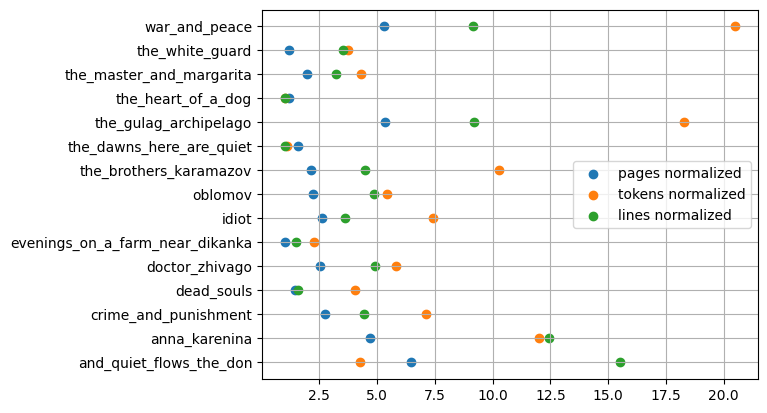

In [13]:
import matplotlib.pyplot as plt

min_num_pages = min(book_to_pages.values())
min_num_tokens = min(book_to_tokens.values())
min_num_lines = min(book_to_lines.values())
plt.scatter(list(map(lambda x: book_to_pages[x] / min_num_pages, BOOKS)), BOOKS, label="pages normalized")
plt.scatter(list(map(lambda x: book_to_tokens[x] / min_num_tokens, BOOKS)), BOOKS, label="tokens normalized")
plt.scatter(list(map(lambda x: book_to_lines[x] / min_num_lines, BOOKS)), BOOKS, label="lines normalized")
plt.legend()
plt.grid()

plt.show()